# Treating outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [2]:
df=sns.load_dataset('diamonds')
df.sample(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
1737,0.32,Ideal,G,VS2,61.6,57.0,561,4.39,4.41,2.71
14311,1.24,Ideal,I,SI1,62.1,56.0,5797,6.84,6.88,4.26
32412,0.41,Ideal,D,SI1,61.7,54.0,791,4.78,4.79,2.95
240,0.71,Ideal,F,SI1,62.5,55.0,2788,5.71,5.65,3.55
13701,1.00,Premium,E,SI1,61.6,59.0,5600,6.41,6.38,3.94
19667,1.12,Ideal,D,VS2,62.0,55.0,8279,6.63,6.66,4.12
22887,1.70,Premium,I,VS2,62.0,59.0,10929,7.60,7.55,4.70
7368,0.90,Fair,E,SI1,59.2,60.0,4220,6.17,6.22,3.67
42316,0.41,Ideal,F,VVS1,60.7,56.0,1295,4.81,4.85,2.93
844,1.08,Premium,D,I1,61.9,60.0,2869,6.55,6.48,4.03


In [3]:
df.isnull().mean()*100

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## OUTLIER TREATMENT
### BOX PLOT

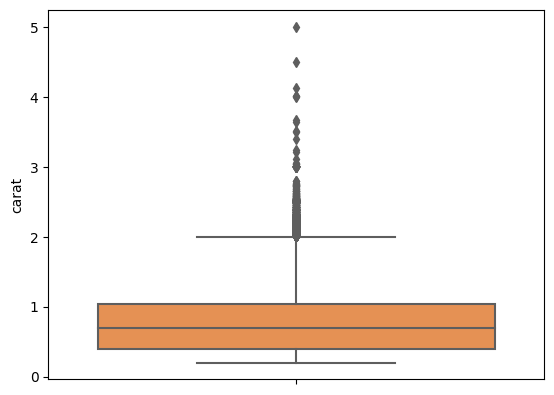

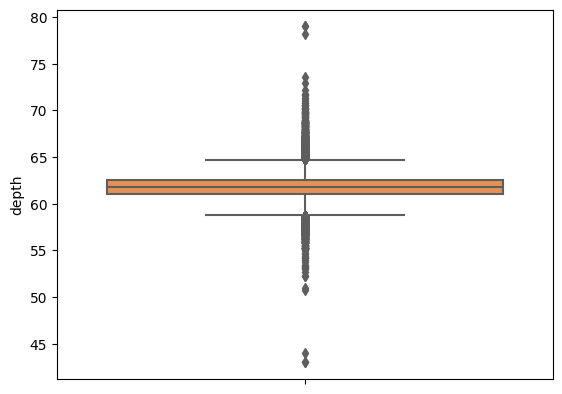

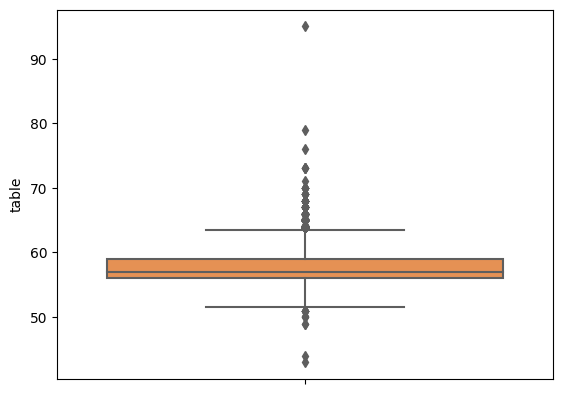

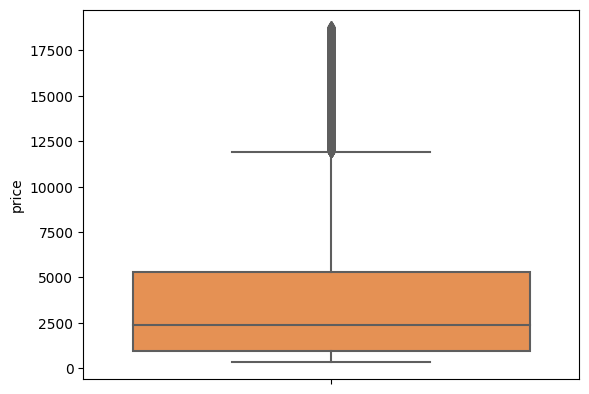

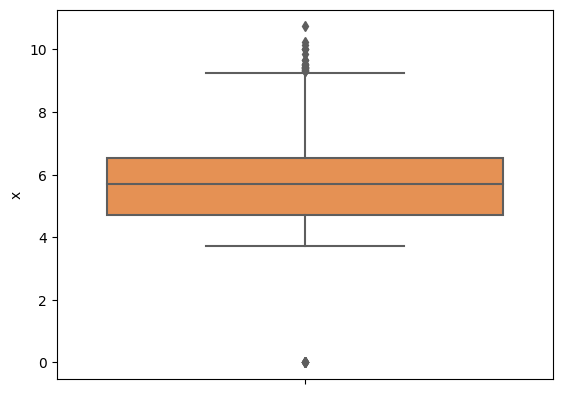

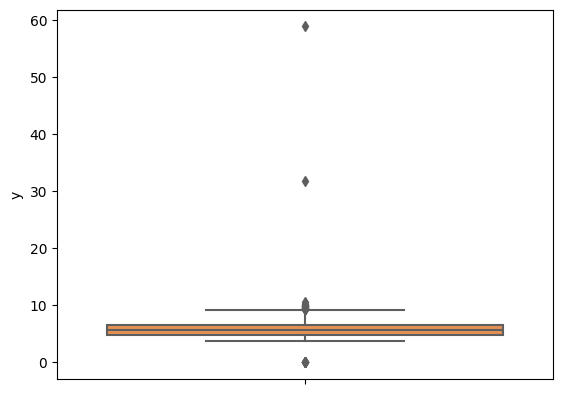

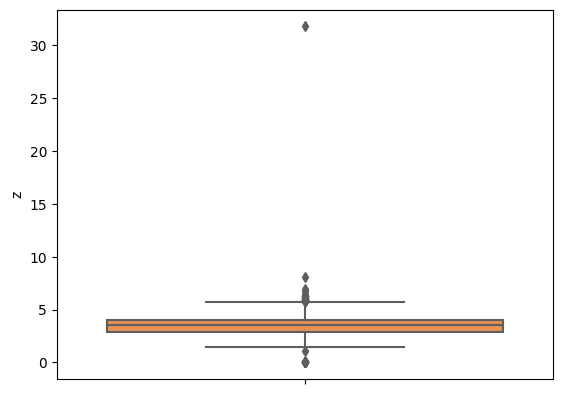

In [5]:
for i in df.columns:
    if df[i].dtype!="category":
        sns.boxplot(y=df[i],palette="YlOrRd_r")
        plt.show()

## SETTING OUTLIER LIMITS:

In [8]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR= Q3 - Q1
    UL=Q3 + 1.5 * IQR
    LL=Q1-1.5 * Q1
    return UL,LL

In [9]:
for column in df.columns:
    if df[column].dtype!='category':
        UL,LL=outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)| (df[column]<LL),np.nan,df[column])

### Lets plot the Barplot again to see the difference

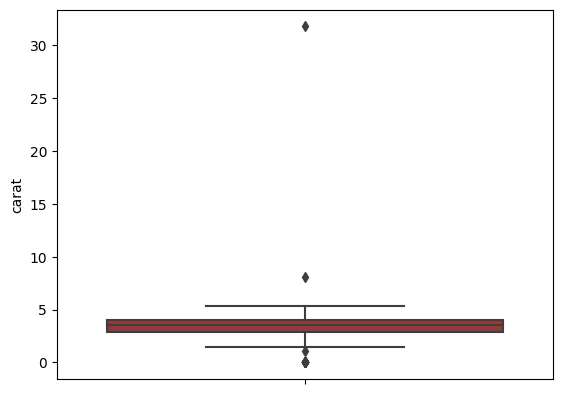

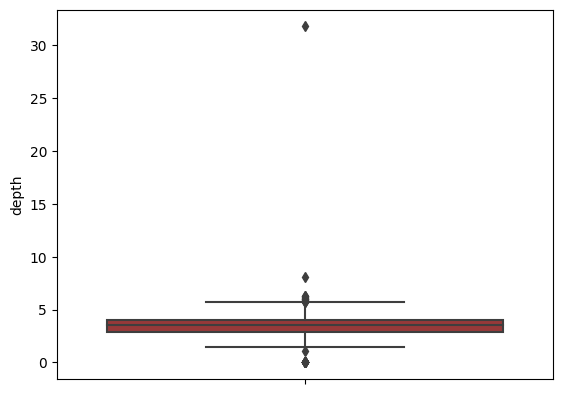

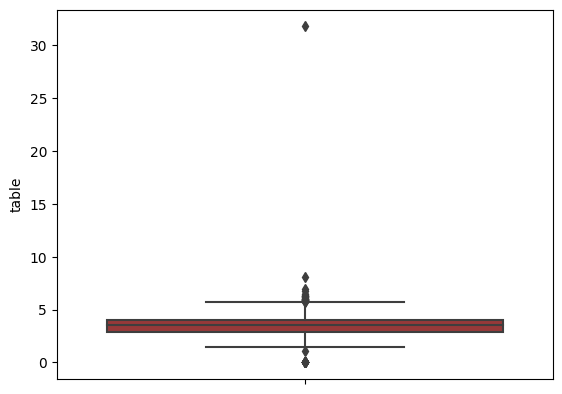

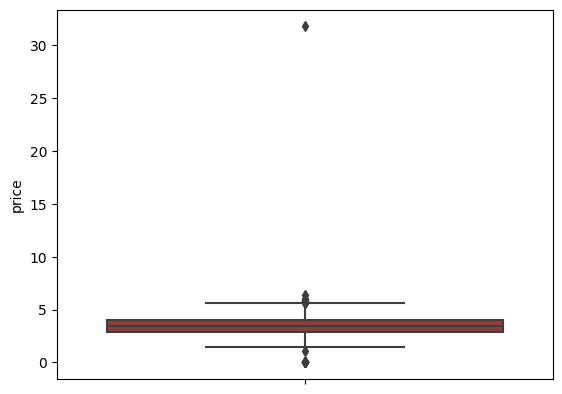

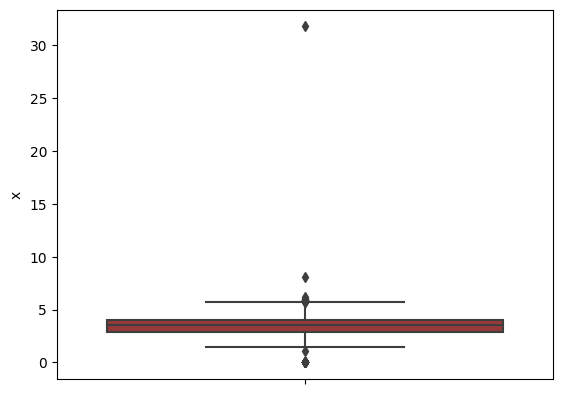

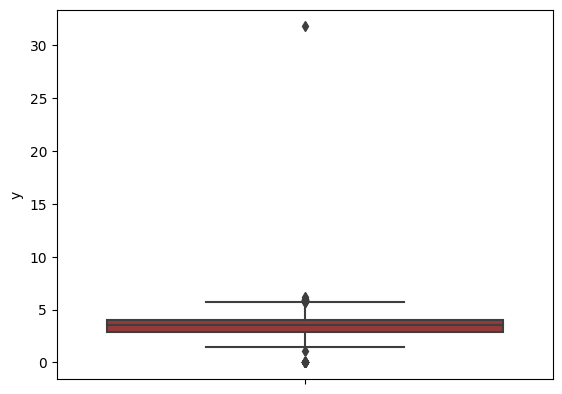

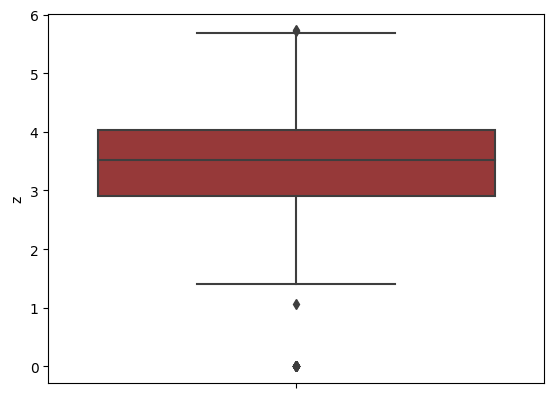

In [11]:
for i in df.columns:
    if df[i].dtype!='category':
        sns.boxplot(y=df[i],color='brown')
        plt.show();